In [ ]:
#pip install pandas statsmodels matplotlib pmdarima

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [30]:
import pandas as pd

df = pd.read_csv("../data/data.csv")
print(df.columns)
df.head(5)

Index(['id', 'Country', 'year', 'goal1', 'goal2', 'goal3', 'goal4', 'goal5',
       'goal6', 'goal7', 'goal8', 'goal9', 'goal10', 'goal11', 'goal12',
       'goal13', 'goal14', 'goal15', 'goal16', 'goal17'],
      dtype='object')


,id,Country,year,goal1,goal2,goal3,goal4,goal5,goal6,goal7,goal8,goal9,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
0,AFG,Afghanistan,2000,8.0,27,19,2,18,14,19,44,5,NaN,34,96,99,NaN,56,42,36
1,AFG,Afghanistan,2001,8.0,30,19,2,18,13,22,44,5,NaN,31,96,99,NaN,56,42,36
2,AFG,Afghanistan,2002,9.0,30,20,2,18,16,21,44,5,NaN,32,95,99,NaN,56,42,36
3,AFG,Afghanistan,2003,10.0,32,20,2,18,17,24,44,5,NaN,32,95,98,NaN,56,42,36
4,AFG,Afghanistan,2004,10.0,31,22,2,18,16,27,44,5,NaN,33,96,98,NaN,56,42,36


In [59]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings

# Ignorar RuntimeWarnings para evitar interrupções no código
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Inicializando a lista para armazenar resultados
for country in df["Country"].unique():
    df_country = df[df["Country"] == country]
    
    count_stationary = 0
    count_non_stationary = 0
    count_insufficient_data = 0
    count_constant_series = 0
    count_error_series = 0  # Contador para qualquer erro genérico

    for col in df.columns[3:]:  
        serie = df_country[col].dropna()  

        if len(serie) > 5:  
            if serie.nunique() > 1:  
                try:
                    resultado_adf = adfuller(serie)
                    p_valor = resultado_adf[1]

                    if p_valor > 0.05:
                        count_non_stationary += 1
                    else:
                        count_stationary += 1
                
                except Exception as e:  # Captura todas as exceções possíveis
                    count_error_series += 1  # Incrementa para qualquer erro encontrado
                    # Opcionalmente, podemos printar o erro se necessário
                    # print(f"Erro na série {col} para o país {country}: {str(e)}")
            else:
                count_constant_series += 1
        else:
            count_insufficient_data += 1

    # Exibe os resultados para cada país
    print(f"\nPaís: {country}")
    print(f"  Estacionários: {count_stationary}")
    print(f"  Não estacionários: {count_non_stationary}")
    print(f"  Dados insuficientes: {count_insufficient_data}")
    print(f"  Séries constantes: {count_constant_series}")
    print(f"  Séries com erro: {count_error_series}")  # Mostra as séries com erro
    print("="*50)



País: Afghanistan
  Estacionários: 7
  Não estacionários: 8
  Dados insuficientes: 2
  Séries constantes: 0
  Séries com erro: 0

País: Albania
  Estacionários: 0
  Não estacionários: 17
  Dados insuficientes: 0
  Séries constantes: 0
  Séries com erro: 0

País: Algeria
  Estacionários: 4
  Não estacionários: 12
  Dados insuficientes: 0
  Séries constantes: 1
  Séries com erro: 0

País: Angola
  Estacionários: 1
  Não estacionários: 16
  Dados insuficientes: 0
  Séries constantes: 0
  Séries com erro: 0

País: Argentina
  Estacionários: 0
  Não estacionários: 17
  Dados insuficientes: 0
  Séries constantes: 0
  Séries com erro: 0

País: Armenia
  Estacionários: 2
  Não estacionários: 14
  Dados insuficientes: 1
  Séries constantes: 0
  Séries com erro: 0

País: Australia
  Estacionários: 4
  Não estacionários: 13
  Dados insuficientes: 0
  Séries constantes: 0
  Séries com erro: 0

País: Austria
  Estacionários: 5
  Não estacionários: 11
  Dados insuficientes: 1
  Séries constantes: 0

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings

# Ignorar RuntimeWarnings para evitar interrupções no código
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dicionário para armazenar os resultados
resultados_por_pais = {}

# Inicializando a lista para armazenar resultados
for country in df["Country"].unique():
    df_country = df[df["Country"] == country]
    
    count_stationary = 0
    count_non_stationary = 0
    count_insufficient_data = 0
    count_constant_series = 0
    count_error_series = 0  # Contador para qualquer erro genérico

    for col in df.columns[3:]:  
        serie = df_country[col].dropna()  

        if len(serie) > 5:  
            if serie.nunique() > 1:  
                try:
                    resultado_adf = adfuller(serie)
                    p_valor = resultado_adf[1]

                    if p_valor > 0.05:
                        count_non_stationary += 1
                    else:
                        count_stationary += 1
                
                except Exception as e:  # Captura todas as exceções possíveis
                    count_error_series += 1  # Incrementa para qualquer erro encontrado
                    # Opcionalmente, podemos printar o erro se necessário
                    # print(f"Erro na série {col} para o país {country}: {str(e)}")
            else:
                count_constant_series += 1
        else:
            count_insufficient_data += 1

    # Armazenando os resultados no dicionário
    resultados_por_pais[country] = {
        "Estacionários": count_stationary,
        "Não estacionários": count_non_stationary,
        "Dados insuficientes": count_insufficient_data,
        "Séries constantes": count_constant_series,
        "Séries com erro": count_error_series
    }

total_estacionarios = sum([resultados["Estacionários"] for resultados in resultados_por_pais.values()])
total_nao_estacionarios = sum([resultados["Não estacionários"] for resultados in resultados_por_pais.values()])
total_dados_insuficientes = sum([resultados["Dados insuficientes"] for resultados in resultados_por_pais.values()])
total_series_constantes = sum([resultados["Séries constantes"] for resultados in resultados_por_pais.values()])
total_series_com_erro = sum([resultados["Séries com erro"] for resultados in resultados_por_pais.values()])

print(f"\nTotal de séries para todos os países:")
print(f"  Estacionários: {total_estacionarios}")
print(f"  Não estacionários: {total_nao_estacionarios}")
print(f"  Dados insuficientes: {total_dados_insuficientes}")
print(f"  Séries constantes: {total_series_constantes}")
print(f"  Séries com erro: {total_series_com_erro}")



Total de séries para todos os países:
  Estacionários: 526
  Não estacionários: 2195
  Dados insuficientes: 70
  Séries constantes: 48
  Séries com erro: 0


In [48]:
from statsmodels.tsa.stattools import adfuller

# Aplicar o teste Dickey-Fuller para cada coluna de metas
for col in df.columns[3:]:  # Pulando 'id', 'Country' e 'year'
    resultado_adf = adfuller(df[col].dropna())  # Remover NaN antes do teste
    print(f"{col}: p-valor = {resultado_adf[1]:.20f}")
    if resultado_adf[1] > 0.05:
        print("\tSérie não-estacionária")
    else:
        print("\tSérie estacionária") #Como a série é estacionária, não é necessário diferenciar a série para aplicar o ARIMA. Logo, eu posso usar o ARIMA diretamente na série original

goal1: p-valor = 0.00000000000000056813
	Série estacionária
goal2: p-valor = 0.00000000000001850607
	Série estacionária
goal3: p-valor = 0.00000000000000060683
	Série estacionária
goal4: p-valor = 0.00000000000012276049
	Série estacionária
goal5: p-valor = 0.00000000000000000020
	Série estacionária
goal6: p-valor = 0.00000000000000785714
	Série estacionária
goal7: p-valor = 0.00000000000030047935
	Série estacionária
goal8: p-valor = 0.00000000000000098923
	Série estacionária
goal9: p-valor = 0.00000000000000001900
	Série estacionária
goal10: p-valor = 0.00000000000806419149
	Série estacionária
goal11: p-valor = 0.00000000000005326152
	Série estacionária
goal12: p-valor = 0.00000000001174765671
	Série estacionária
goal13: p-valor = 0.00000000000010540055
	Série estacionária
goal14: p-valor = 0.00000000000025555437
	Série estacionária
goal15: p-valor = 0.00000000000000101673
	Série estacionária
goal16: p-valor = 0.00000000000017455489
	Série estacionária
goal17: p-valor = 0.0000000000000

In [14]:
from statsmodels.tsa.stattools import adfuller

# Teste Dickey-Fuller
resultado_adf = adfuller(serie_temporal[objetivo])
print(f"p-valor: {resultado_adf[1]}")  # Se p-valor > 0.05, a série não é estacionária

# Se necessário, diferença a série para torná-la estacionária
if resultado_adf[1] > 0.05:
    serie_temporal_diff = serie_temporal.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(serie_temporal_diff, marker='o', linestyle='-', label=f"{objetivo} Diferenciado ({pais})")
    plt.title(f"Série Temporal Diferenciada do {objetivo} - {pais}")
    plt.xlabel("Ano")
    plt.ylabel("Progresso (%)")
    plt.legend()
    plt.grid()
    plt.show()

p-valor: 0.0013638125519277668


In [18]:
from pmdarima import auto_arima

# Usar auto_arima para encontrar os melhores parâmetros
modelo_auto = auto_arima(serie_temporal, seasonal=False, stepwise=True, trace=True)

# Exibir o resumo do modelo
print(modelo_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=118.765, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=119.094, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=119.410, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=118.892, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=120.997, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.267 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -57.382
Date:                Tue, 18 Mar 2025   AIC                            118.765
Time:                        11:35:33   BIC                            121.036
Sample:                             0   HQIC                           119.336
                    

/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: 

                               SARIMAX Results                                
Dep. Variable:                  goal1   No. Observations:                   24
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -58.446
Date:                Tue, 18 Mar 2025   AIC                            118.892
Time:                        11:36:48   BIC                            120.028
Sample:                             0   HQIC                           119.178
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.4347      1.875      5.033      0.000       5.760      13.109
Ljung-Box (L1) (Q):                   1.89   Jarque-Bera (JB):                22.47
Prob(Q):                              0.17   Pr

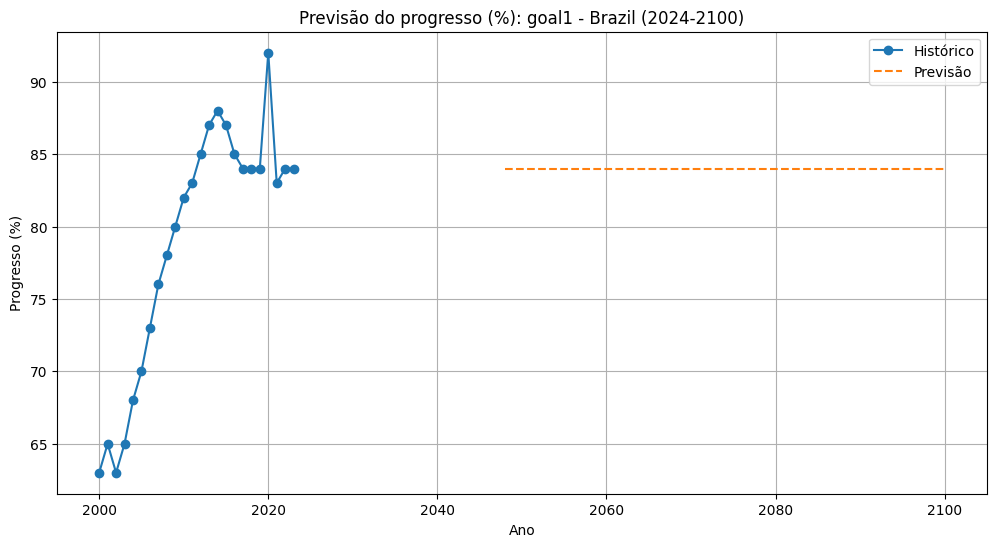

Previsão para o ano de 2030 (Brazil, goal1): nan%


In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar o modelo ARIMA com os parâmetros encontrados
modelo_arima = ARIMA(serie_temporal, order=(0, 1, 0))
modelo_ajustado = modelo_arima.fit()

# Exibir o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Prever os próximos anos (2024 até 2100)
anos_futuros = pd.DataFrame({"year": range(2024, 2101)})
previsoes = modelo_ajustado.forecast(steps=len(anos_futuros))

# Criar um dataframe com as previsões
df_previsoes = pd.DataFrame({
    "year": anos_futuros["year"],
    "prediction": previsoes
})

# Visualizar as previsões
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Histórico", marker='o')
plt.plot(df_previsoes["year"], df_previsoes["prediction"], label="Previsão", linestyle="--")
plt.title(f"Previsão do progresso (%): {objetivo} - {pais} (2024-2100)")
plt.xlabel("Ano")
plt.ylabel("Progresso (%)")
plt.legend()
plt.grid()
plt.show()

# Foco no ano de 2030
previsao_2030 = df_previsoes[df_previsoes["year"] == 2030]
print(f"Previsão para o ano de 2030 ({pais}, {objetivo}): {previsao_2030['prediction'].values[0]:.2f}%")

/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: 

                               SARIMAX Results                                
Dep. Variable:                  goal1   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -57.998
Date:                Tue, 18 Mar 2025   AIC                            121.996
Time:                        11:38:08   BIC                            125.402
Sample:                             0   HQIC                           122.853
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5513      2.148     -0.257      0.797      -4.762       3.659
ma.L1          0.3857      2.170      0.178      0.859      -3.868       4.640
sigma2         9.0565      2.661      3.404      0.0

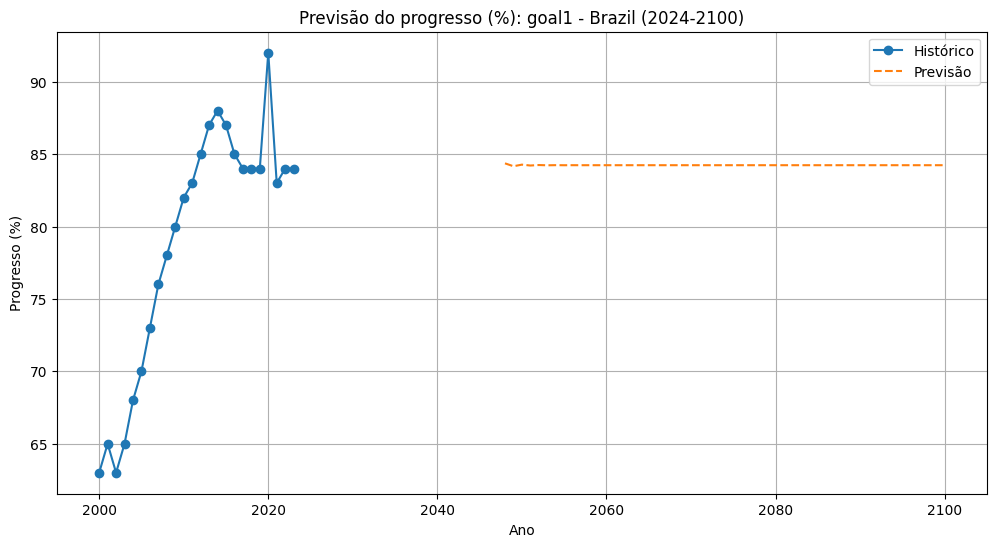

Previsão para o ano de 2030 (Brazil, goal1): nan%


In [20]:
# Ajustar manualmente o modelo ARIMA(1,1,1)
modelo_arima = ARIMA(serie_temporal, order=(1, 1, 1))
modelo_ajustado = modelo_arima.fit()

# Exibir o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Prever os próximos anos (2024 até 2100)
anos_futuros = pd.DataFrame({"year": range(2024, 2101)})
previsoes = modelo_ajustado.forecast(steps=len(anos_futuros))

# Criar um dataframe com as previsões
df_previsoes = pd.DataFrame({
    "year": anos_futuros["year"],
    "prediction": previsoes
})

# Visualizar as previsões
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Histórico", marker='o')
plt.plot(df_previsoes["year"], df_previsoes["prediction"], label="Previsão", linestyle="--")
plt.title(f"Previsão do progresso (%): {objetivo} - {pais} (2024-2100)")
plt.xlabel("Ano")
plt.ylabel("Progresso (%)")
plt.legend()
plt.grid()
plt.show()

# Foco no ano de 2030
previsao_2030 = df_previsoes[df_previsoes["year"] == 2030]
print(f"Previsão para o ano de 2030 ({pais}, {objetivo}): {previsao_2030['prediction'].values[0]:.2f}%")

In [21]:
# Verificar a série temporal original
print("Série Temporal Original:")
print(serie_temporal.head(10))

# Verificar a série diferenciada (caso tenha sido usada internamente pelo ARIMA)
serie_diferenciada = serie_temporal.diff().dropna()
print("\nSérie Diferenciada:")
print(serie_diferenciada.head(10))

Série Temporal Original:
      goal1
year       
2000   63.0
2001   65.0
2002   63.0
2003   65.0
2004   68.0
2005   70.0
2006   73.0
2007   76.0
2008   78.0
2009   80.0

Série Diferenciada:
      goal1
year       
2001    2.0
2002   -2.0
2003    2.0
2004    3.0
2005    2.0
2006    3.0
2007    3.0
2008    2.0
2009    2.0
2010    2.0


/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Ma

                               SARIMAX Results                                
Dep. Variable:                  goal1   No. Observations:                   24
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -57.758
Date:                Tue, 18 Mar 2025   AIC                            127.517
Time:                        11:39:57   BIC                            134.585
Sample:                             0   HQIC                           129.392
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.2783      4.473     16.829      0.000      66.511      84.046
ar.L1          1.9700      0.029     68.266      0.000       1.913       2.027
ar.L2         -0.9947      0.029    -34.098      0.0

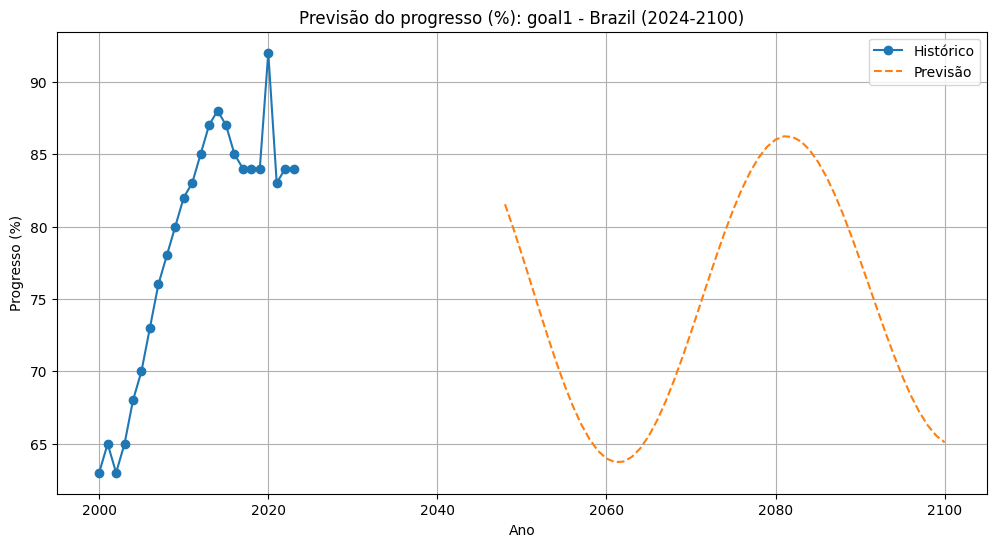

Previsão para o ano de 2030 (Brazil, goal1): nan%


In [22]:
# Ajustar o modelo ARIMA(2,0,2)
modelo_arima = ARIMA(serie_temporal, order=(2, 0, 2))
modelo_ajustado = modelo_arima.fit()

# Exibir o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Prever os próximos anos (2024-2100)
anos_futuros = pd.DataFrame({"year": range(2024, 2101)})
previsoes = modelo_ajustado.forecast(steps=len(anos_futuros))

# Criar um dataframe com as previsões
df_previsoes = pd.DataFrame({
    "year": anos_futuros["year"],
    "prediction": previsoes
})

# Visualizar as previsões
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Histórico", marker='o')
plt.plot(df_previsoes["year"], df_previsoes["prediction"], label="Previsão", linestyle="--")
plt.title(f"Previsão do progresso (%): {objetivo} - {pais} (2024-2100)")
plt.xlabel("Ano")
plt.ylabel("Progresso (%)")
plt.legend()
plt.grid()
plt.show()

# Foco no ano de 2030
previsao_2030 = df_previsoes[df_previsoes["year"] == 2030]
print(f"Previsão para o ano de 2030 ({pais}, {objetivo}): {previsao_2030['prediction'].values[0]:.2f}%")

                               SARIMAX Results                                
Dep. Variable:                  goal1   No. Observations:                   24
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -58.243
Date:                Tue, 18 Mar 2025   AIC                            120.486
Time:                        11:40:47   BIC                            122.757
Sample:                             0   HQIC                           121.057
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1074      0.179     -0.599      0.549      -0.459       0.244
sigma2         9.2648      2.731      3.393      0.001       3.912      14.617
Ljung-Box (L1) (Q):                   0.64   Jarque-

/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/everysens-m15/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: 

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

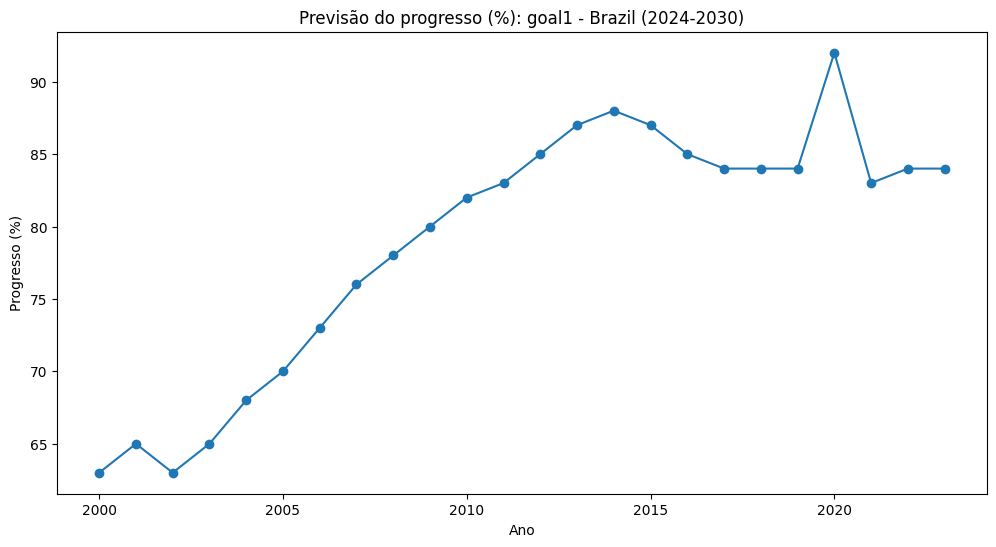

In [23]:
# Ajustar o modelo ARIMA(0,1,1) para capturar a tendência linear
modelo_arima = ARIMA(serie_temporal, order=(0, 1, 1))
modelo_ajustado = modelo_arima.fit()

# Exibir o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Prever os próximos anos (2024 até 2030, foco no curto prazo)
anos_futuros = pd.DataFrame({"year": range(2024, 2031)})  # Apenas até 2030
previsoes = modelo_ajustado.forecast(steps=len(anos_futuros))

# Criar um dataframe com as previsões
df_previsoes = pd.DataFrame({
    "year": anos_futuros["year"],
    "prediction": previsoes
})

# Visualizar as previsões
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Histórico", marker='o')
plt.plot(df_previsoes["year"], df_previsoes["prediction"], label="Previsão", linestyle="--")
plt.title(f"Previsão do progresso (%): {objetivo} - {pais} (2024-2030)")
plt.xlabel("Ano")
plt.ylabel("Progresso (%)")
plt.legend

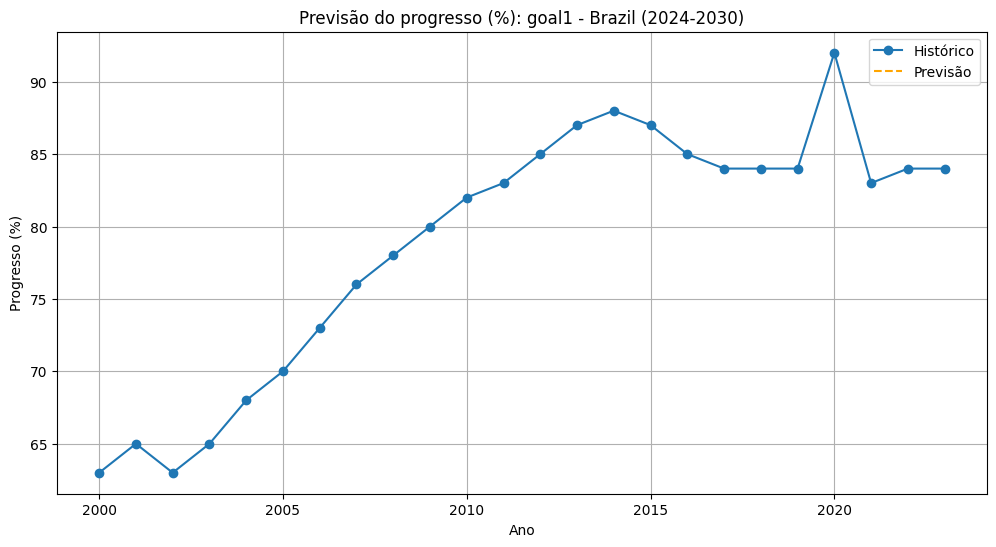

Previsão para o ano de 2030 (Brazil, goal1): nan%


In [24]:
# Visualizar as previsões junto com a série histórica
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label="Histórico", marker='o')  # Dados históricos
plt.plot(df_previsoes["year"], df_previsoes["prediction"], label="Previsão", linestyle="--", color="orange")  # Previsões
plt.title(f"Previsão do progresso (%): {objetivo} - {pais} (2024-2030)")
plt.xlabel("Ano")
plt.ylabel("Progresso (%)")
plt.legend()
plt.grid()
plt.show()

# Foco no ano de 2030
previsao_2030 = df_previsoes[df_previsoes["year"] == 2030]
print(f"Previsão para o ano de 2030 ({pais}, {objetivo}): {previsao_2030['prediction'].values[0]:.2f}%")